This notebook looks at the vertical eddy viscosity/diffusivity during a deep water renewal event in late August 2003.

Compares kappa=10 to kappa=20.5


In [1]:
%matplotlib inline
from matplotlib import pylab
import matplotlib.pyplot as plt
import netCDF4 as NC
import numpy as np
import os

from salishsea_tools import (nc_tools,viz_tools)

In [2]:
# Load the data. Path name can be changed to look at different data.  
runs=['dwr_notsmooth_kappa10','dwr_notsmooth']
base='/data/nsoontie/MEOPAR/SalishSea/results/stratification/'
sals={}; depths={}; avms={}; avds={}; Ws={};depthws={}; Us={}; Vs={}
for run in runs:
    path = os.path.join(base,'{}/SalishSea_1d_20030819_20030927_grid_T.nc'.format(run))
    f = NC.Dataset(path,'r');
    sals[run]=f.variables['vosaline']
    depths[run] = f.variables['deptht'] 
    T_lat = f.variables['nav_lat']
    T_lon = f.variables['nav_lon']

    #Loading eddy viscosity/diffusivity data on the vertical grid
    path = os.path.join(base,'{}/SalishSea_1d_20030819_20030927_grid_W.nc'.format(run))
    f = NC.Dataset(path,'r');
    avms[run]=f.variables['ve_eddy_visc']
    avds[run]= f.variables['ve_eddy_diff'] #
    Ws[run]=f.variables['vovecrtz']
    depthws[run] = f.variables['depthw']

    #Loading data on the ugrid
    path = os.path.join(base,'{}/SalishSea_1d_20030819_20030927_grid_U.nc'.format(run))
    f = NC.Dataset(path,'r');
    Us[run]=f.variables['vozocrtx']


    #Loading data on the ugrid
    path = os.path.join(base,'{}/SalishSea_1d_20030819_20030927_grid_V.nc'.format(run))
    f = NC.Dataset(path,'r');
    Vs[run]=f.variables['vomecrty']


grid = NC.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
bathy=grid.variables['Bathymetry']


# Basic Comparison

Which case has higher eddy viscosity? Higher average? How does it change over time? Where are the max values?


In [3]:

maxes_diff={}; maxes_visc={}; means_diff={}; means_visc={}; inds_diff={}; inds_visc={}

for run in runs:
    maxes_diff[run]=[]; maxes_visc[run]=[]; means_diff[run]=[]; means_visc[run]=[]; inds_diff[run]=[]
    inds_visc[run]=[]
    for t in np.arange(0,sals[run].shape[0]):
        maxes_diff[run].append(np.max(avds[run][t,:,:,:]))
        ind =np.argmax(avds[run][t,:,:,:])
        inds_diff[run].append(np.unravel_index(ind, avds[run][t,:,:,:].shape))
        maxes_visc[run].append(np.max(avms[run][t,:,:,:]))
        ind =np.argmax(avms[run][t,:,:,:])
        inds_visc[run].append(np.unravel_index(ind, avms[run][t,:,:,:].shape))
        means_diff[run].append(np.nanmean(avds[run][t,:,:,:]))
        means_visc[run].append(np.nanmean(avms[run][t,:,:,:]))

In [5]:
for run in runs:
    print run
    print inds_diff[run]
    print inds_visc[run]



dwr_notsmooth_kappa10
[(1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119)]
[(1, 801, 130), (1, 801, 130), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 778, 122), (1, 778, 122), (1, 778, 122), (1, 801, 130), (1, 801, 130), (1, 778, 122), (1, 778, 121), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 773, 119), (1, 778, 122), (1, 778, 122), (1, 778, 122), (

Where are the highest vertical eddy coeffcients? Notsmooth changes over time but it looks like it is always in the northern part of the domain

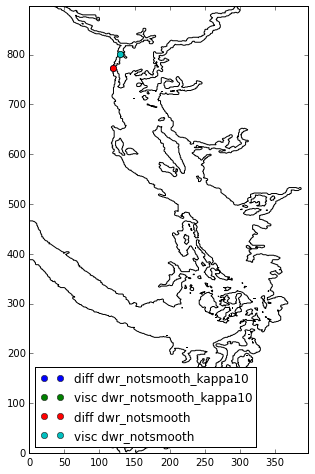

In [6]:
fig,ax=plt.subplots(1,1,figsize=(5,8))
viz_tools.plot_coastline(ax,grid)
for run in runs:
    ax.plot(inds_diff[run][0][2],inds_diff[run][0][1],'o',label='diff ' + run)
    ax.plot(inds_visc[run][0][2],inds_visc[run][0][1],'o',label='visc ' + run)
plt.legend(loc=0)

* For some reason there are high eddy coefficients in the smooth case at the northern boundary.
* nosmooth has high eddy coefficiets at Seymour Narrows and Johnstone Strait


/home/nsoontie/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


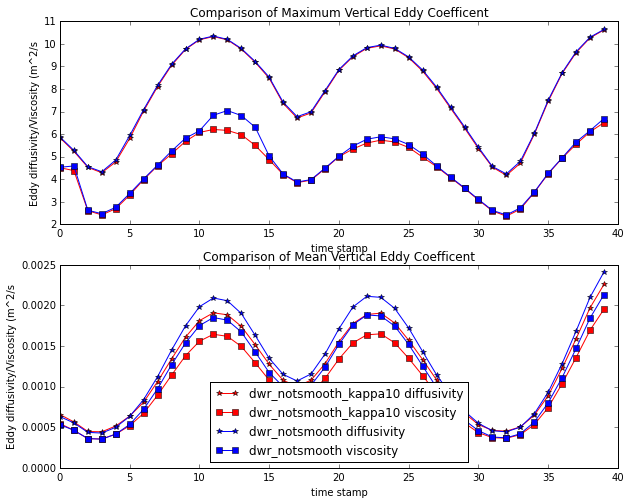

In [10]:
fig,axs=plt.subplots(2,1,figsize=(10,8))
ts=np.arange(0,sals['dwr_notsmooth_kappa10'].shape[0])
#maxes
ax=axs[0]
run='dwr_notsmooth_kappa10'
ax.plot(ts,maxes_diff[run],'*-r',label=run +' diffusivity')
ax.plot(ts,maxes_visc[run],'s-r',label=run +' viscosity')
run='dwr_notsmooth'
ax.plot(ts,maxes_diff[run],'*-b',label=run +' diffusivity')
ax.plot(ts,maxes_visc[run],'s-b',label=run +' viscosity')
ax.set_xlabel('time stamp')
ax.set_ylabel('Eddy diffusivity/Viscosity (m^2/s')
ax.set_title('Comparison of Maximum Vertical Eddy Coefficent')
plt.legend(loc=0)

#means
ax=axs[1]
run='dwr_notsmooth_kappa10'
ax.plot(ts,means_diff[run],'*-r',label=run +' diffusivity')
ax.plot(ts,means_visc[run],'s-r',label=run +' viscosity')
run='dwr_notsmooth'
ax.plot(ts,means_diff[run],'*-b',label=run +' diffusivity')
ax.plot(ts,means_visc[run],'s-b',label=run +' viscosity')
    
ax.set_xlabel('time stamp')
ax.set_ylabel('Eddy diffusivity/Viscosity (m^2/s')
ax.set_title('Comparison of Mean Vertical Eddy Coefficent')
plt.legend(loc=0)

Slightly lower vertical vicsosities and diffusivities in the kappa10 case.

# Excluding northern Areas

In [11]:

maxes_diff={}; maxes_visc={}; means_diff={}; means_visc={}; inds_diff={}; inds_visc={}
js=0; je=700

for run in runs:
    maxes_diff[run]=[]; maxes_visc[run]=[]; means_diff[run]=[]; means_visc[run]=[]; inds_diff[run]=[]
    inds_visc[run]=[]
    for t in np.arange(0,sals[run].shape[0]):
        maxes_diff[run].append(np.max(avds[run][t,:,js:je,:]))
        ind =np.argmax(avds[run][t,:,js:je,:])
        inds_diff[run].append(np.unravel_index(ind, avds[run][t,:,js:je,:].shape))
        maxes_visc[run].append(np.max(avms[run][t,:,js:je,:]))
        ind =np.argmax(avms[run][t,:,js:je,:])
        inds_visc[run].append(np.unravel_index(ind, avms[run][t,:,js:je,:].shape))
        means_diff[run].append(np.nanmean(avds[run][t,:,js:je,:]))
        means_visc[run].append(np.nanmean(avms[run][t,:,js:je,:]))

In [13]:
print inds_diff['dwr_notsmooth_kappa10']
print inds_visc['dwr_notsmooth_kappa10']
print inds_diff['dwr_notsmooth']
print inds_visc['dwr_notsmooth']

[(33, 298, 239), (28, 342, 249), (29, 340, 248), (28, 340, 248), (27, 342, 249), (29, 340, 248), (28, 342, 249), (28, 342, 249), (27, 342, 249), (27, 342, 249), (27, 342, 249), (27, 342, 249), (27, 342, 249), (27, 342, 249), (27, 342, 249), (27, 342, 249), (27, 342, 249), (27, 342, 249), (27, 342, 249), (27, 342, 249), (27, 342, 249), (27, 342, 249), (27, 342, 249), (27, 342, 249), (27, 342, 249), (27, 342, 249), (27, 342, 249), (28, 342, 249), (29, 340, 248), (28, 342, 249), (28, 340, 248), (29, 340, 248), (29, 340, 248), (27, 342, 249), (29, 340, 248), (29, 340, 248), (27, 342, 249), (27, 342, 249), (1, 279, 264), (28, 342, 249)]
[(34, 347, 249), (32, 342, 248), (32, 342, 247), (32, 342, 247), (32, 342, 247), (32, 342, 247), (32, 342, 247), (1, 279, 264), (1, 279, 264), (1, 279, 264), (1, 279, 264), (1, 279, 264), (1, 279, 264), (1, 279, 264), (1, 279, 264), (1, 279, 264), (1, 279, 264), (27, 342, 249), (1, 279, 264), (1, 279, 264), (1, 279, 264), (1, 342, 249), (1, 279, 264), (1, 27

Now it looks  like the largest eddy coefficients are in and around the Boundary Pass area. Why is the largest eddy viscosity close to the surface?

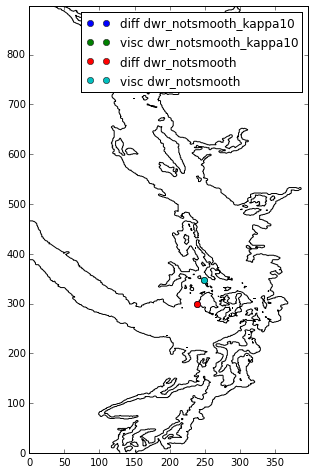

In [14]:
fig,ax=plt.subplots(1,1,figsize=(5,8))
viz_tools.plot_coastline(ax,grid)
for run in runs:
    ax.plot(inds_diff[run][0][2],inds_diff[run][0][1],'o',label='diff ' + run)
    ax.plot(inds_visc[run][0][2],inds_visc[run][0][1],'o',label='visc ' + run)
plt.legend(loc=0)

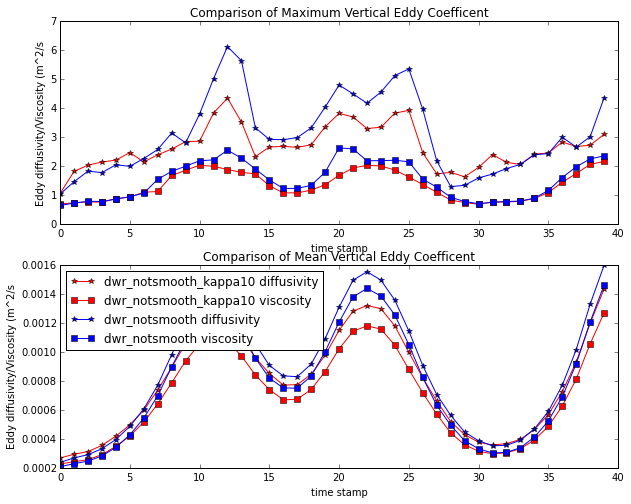

In [15]:
fig,axs=plt.subplots(2,1,figsize=(10,8))
ts=np.arange(0,sals['dwr_notsmooth_kappa10'].shape[0])
#maxes
ax=axs[0]
run='dwr_notsmooth_kappa10'
ax.plot(ts,maxes_diff[run],'*-r',label=run +' diffusivity')
ax.plot(ts,maxes_visc[run],'s-r',label=run +' viscosity')
run='dwr_notsmooth'
ax.plot(ts,maxes_diff[run],'*-b',label=run +' diffusivity')
ax.plot(ts,maxes_visc[run],'s-b',label=run +' viscosity')
ax.set_xlabel('time stamp')
ax.set_ylabel('Eddy diffusivity/Viscosity (m^2/s')
ax.set_title('Comparison of Maximum Vertical Eddy Coefficent')
plt.legend(loc=0)

#means
ax=axs[1]
run='dwr_notsmooth_kappa10'
ax.plot(ts,means_diff[run],'*-r',label=run +' diffusivity')
ax.plot(ts,means_visc[run],'s-r',label=run +' viscosity')
run='dwr_notsmooth'
ax.plot(ts,means_diff[run],'*-b',label=run +' diffusivity')
ax.plot(ts,means_visc[run],'s-b',label=run +' viscosity')
    
ax.set_xlabel('time stamp')
ax.set_ylabel('Eddy diffusivity/Viscosity (m^2/s')
ax.set_title('Comparison of Mean Vertical Eddy Coefficent')
plt.legend(loc=0)

# Thalweg

Plotting salinity and eddy viscosity/diffusivity along thalweg over time. Daily average outputs over 10 days.

In [6]:
lines = np.loadtxt('/data/nsoontie/MEOPAR/tools/bathymetry/thalweg_working.txt', delimiter=" ", unpack=False)
lines = lines.astype(int)

thalweg_lon = T_lon[lines[:,0],lines[:,1]]
thalweg_lat = T_lat[lines[:,0],lines[:,1]]

ds=np.arange(0,lines.shape[0],1);
vs=np.arange(34,27.5,-0.5);
XX_T={}; ZZ_T={}; XX_W={}; ZZ_W={} 
for run in runs:
    XX_T[run],ZZ_T[run] = np.meshgrid(ds,-depths[run][:])
    XX_W[run],ZZ_W[run] = np.meshgrid(ds,-depthws[run][:])

Salinity difference along thalweg over time.

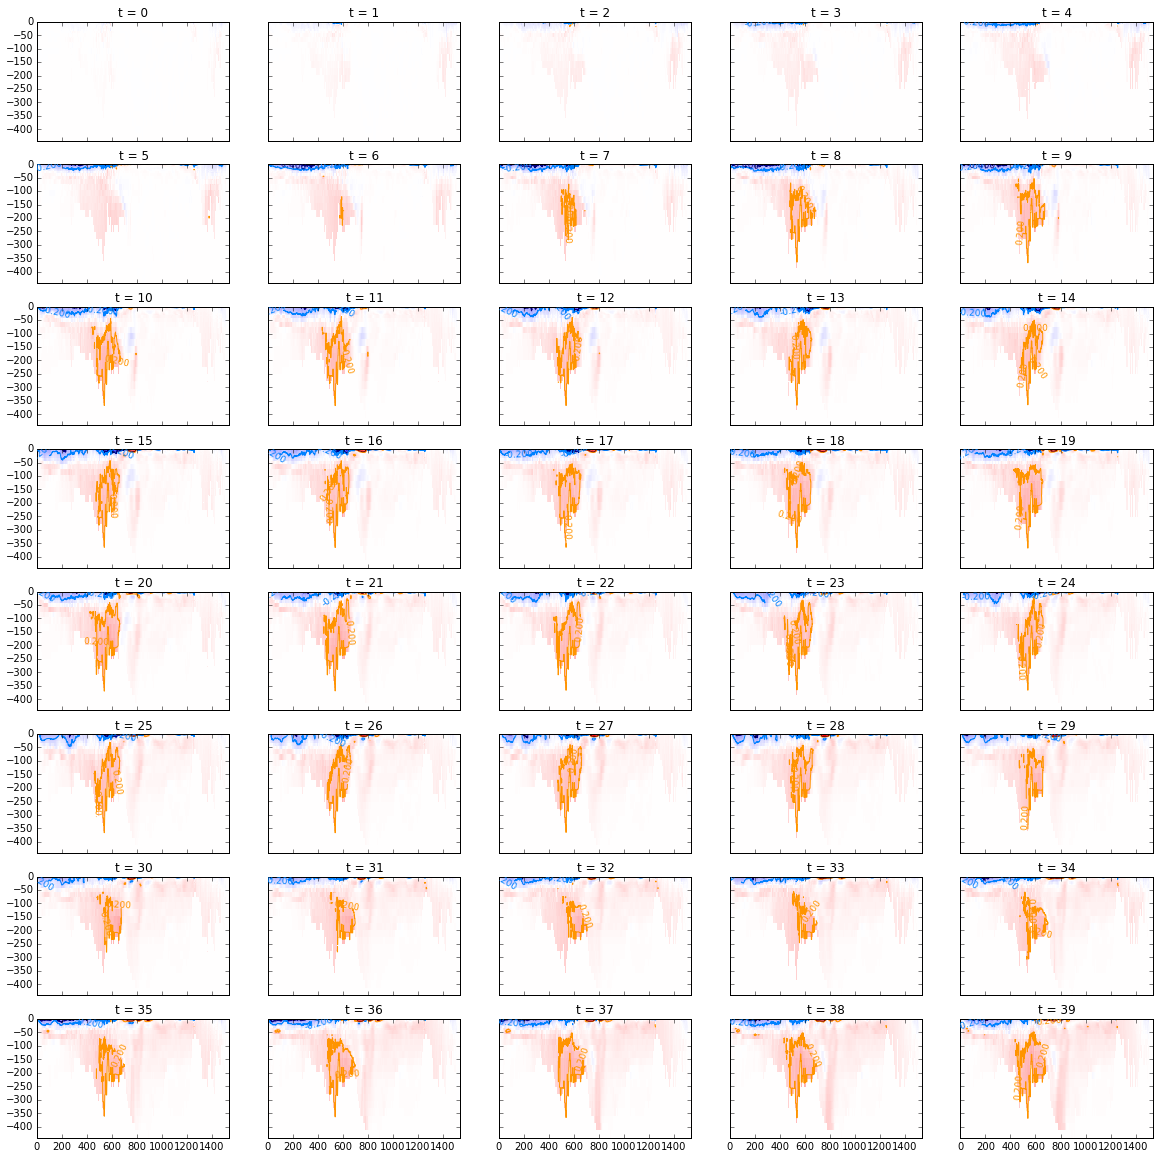

In [43]:
fig,axs=plt.subplots(8,5,figsize=(20,20),sharex=True,sharey=True)
smin=-1;smax=1
run1='dwr_notsmooth_kappa10'; run2='dwr_notsmooth'
diff = sals[run1][:]-sals[run2][:]
for t,ax in zip(np.arange(40),axs.flat):
    mesh=ax.pcolormesh(XX_T[run],ZZ_T[run],(diff[t,:,lines[:,0],lines[:,1]]).T,vmin=smin,vmax=smax,cmap='bwr')
    CS=ax.contour(XX_T[run],ZZ_T[run],(diff[t,:,lines[:,0],lines[:,1]]).T,[-.4,-.2,0.2,.4])
    ax.clabel(CS,fontsize=9, inline=1)
    ax.set_ylim(ax.get_ylim()[::-1])
    ax.set_title('t = ' +str(t))

Colorbar is satuarated at -1,1 salinity units.
* surface JdF is fresher (about .2-.4 psu)
* water over sills is >0.2 psu saltier
* DWR event is <0.2 psu saltier

### Eddy coefficients

#### Smooth

Next I will plot the salinity field, and eddy viscosity/diffusivity along the thalweg. Each row of plots corresponds to a daily average. A deep water renewal event occurs around t=6 (the 30.5 salinity contour is slightly elevated on the left hand slope of the Strait of Georgia basin). 

-c:18: RuntimeWarning: divide by zero encountered in log10
-c:23: RuntimeWarning: divide by zero encountered in log10


Left: Salinity
Middle: Eddy Viscosity
Right: Eddy Diffusivity


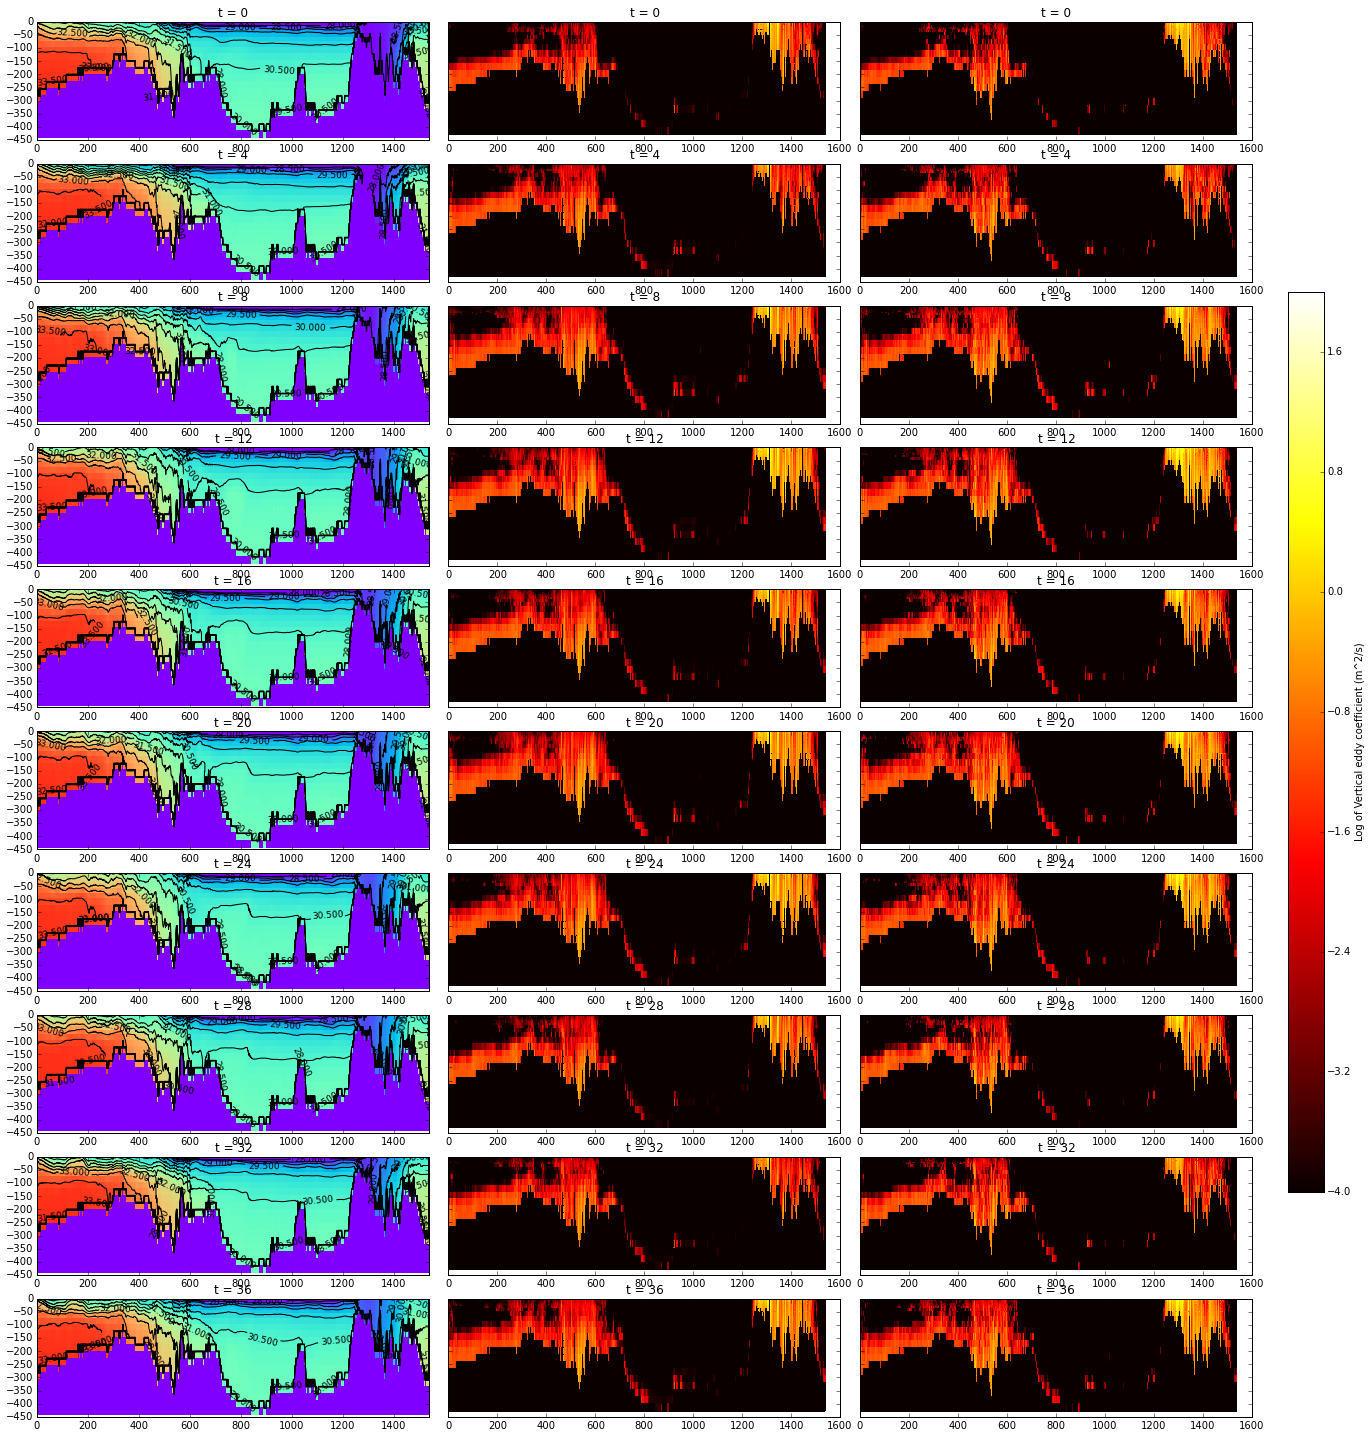

In [46]:
smin=28; smax=34
emin=-4; emax=2

(fig,axs)=plt.subplots(10,3,figsize=(25,25),sharey=True)
ts=np.arange(0,40,4)

run='dwr_notsmooth_kappa10'
for t,axS,axV,axD in zip(ts,axs[:,0],axs[:,1],axs[:,2]):
    #salinity
    salP=sals[run][t,:,lines[:,0],lines[:,1]];
    mesh=axS.pcolormesh(XX_T[run],ZZ_T[run],salP,vmin=smin,vmax=smax,cmap='rainbow')
    CS=axS.contour(XX_T[run],ZZ_T[run],salP,vs, colors='black')
    axS.clabel(CS,fontsize=9, inline=1)
    axS.set_title('t = ' +str(t))

    #viscosity
    avmP=avms[run][t,:,lines[:,0],lines[:,1]];
    mesh=axV.pcolormesh(XX_W[run],ZZ_W[run],np.log10(avmP),vmin=emin, vmax=emax,cmap='hot')
    axV.set_title('t = ' +str(t))
    
    #diffusivity
    avdP=avds[run][t,:,lines[:,0],lines[:,1]];
    mesh=axD.pcolormesh(XX_W[run],ZZ_W[run],np.log10(avdP),vmin=emin,vmax=emax,cmap='hot')
    axD.set_title('t = ' +str(t))
    
fig.subplots_adjust(wspace=0.05)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.25, 0.02, 0.5])
cbar=fig.colorbar(mesh, cax=cbar_ax)
cbar.set_label('Log of Vertical eddy coefficient (m^2/s)')

print 'Left: Salinity'
print 'Middle: Eddy Viscosity'
print 'Right: Eddy Diffusivity'

#### Not smooth

Left: Salinity
Middle: Eddy Viscosity
Right: Eddy Diffusivity


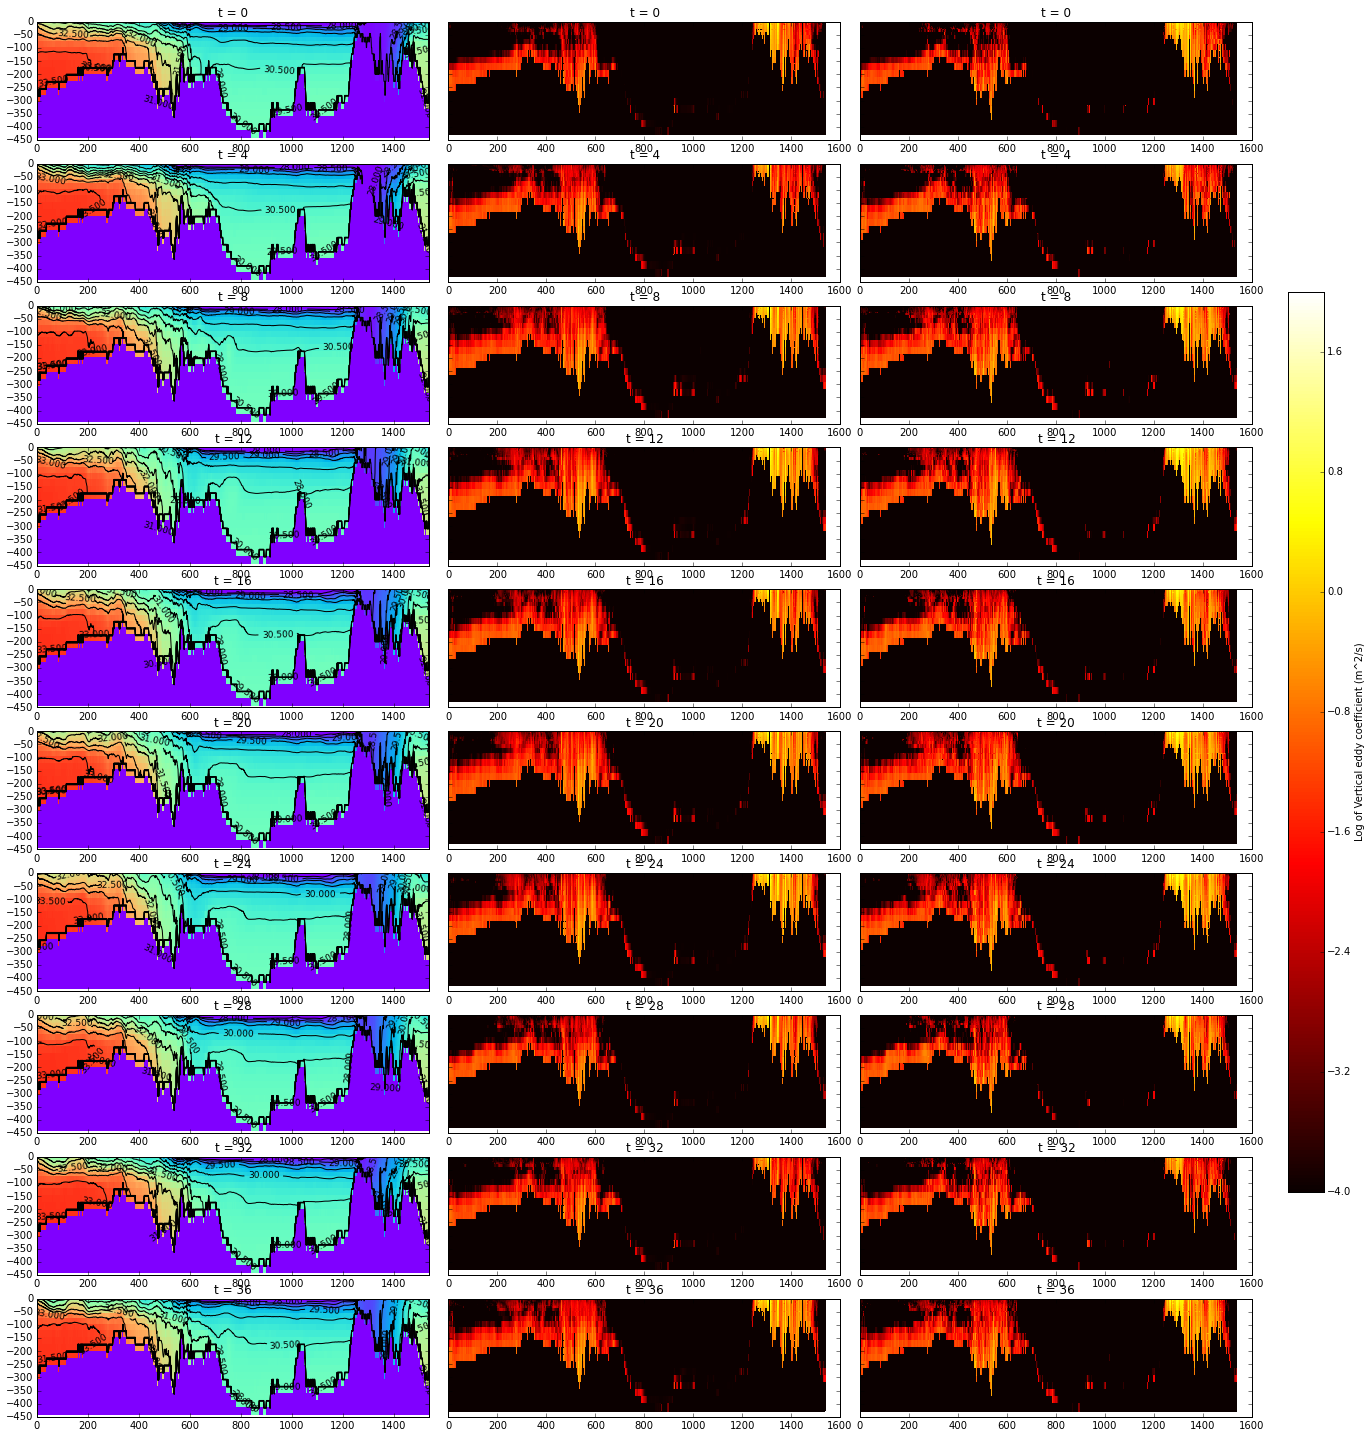

In [47]:
smin=28; smax=34
emin=-4; emax=2

(fig,axs)=plt.subplots(10,3,figsize=(25,25),sharey=True)
ts=np.arange(0,40,4)

run='dwr_notsmooth'
for t,axS,axV,axD in zip(ts,axs[:,0],axs[:,1],axs[:,2]):
    #salinity
    salP=sals[run][t,:,lines[:,0],lines[:,1]];
    mesh=axS.pcolormesh(XX_T[run],ZZ_T[run],salP,vmin=smin,vmax=smax,cmap='rainbow')
    CS=axS.contour(XX_T[run],ZZ_T[run],salP,vs, colors='black')
    axS.clabel(CS,fontsize=9, inline=1)
    axS.set_title('t = ' +str(t))

    #viscosity
    avmP=avms[run][t,:,lines[:,0],lines[:,1]];
    mesh=axV.pcolormesh(XX_W[run],ZZ_W[run],np.log10(avmP),vmin=emin, vmax=emax,cmap='hot')
    axV.set_title('t = ' +str(t))
    
    #diffusivity
    avdP=avds[run][t,:,lines[:,0],lines[:,1]];
    mesh=axD.pcolormesh(XX_W[run],ZZ_W[run],np.log10(avdP),vmin=emin,vmax=emax,cmap='hot')
    axD.set_title('t = ' +str(t))
    
fig.subplots_adjust(wspace=0.05)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.25, 0.02, 0.5])
cbar=fig.colorbar(mesh, cax=cbar_ax)
cbar.set_label('Log of Vertical eddy coefficient (m^2/s)')

print 'Left: Salinity'
print 'Middle: Eddy Viscosity'
print 'Right: Eddy Diffusivity'

Not all that helpful. 

The path of the thalweg is shown below.

[-126, -122, 47, 51]

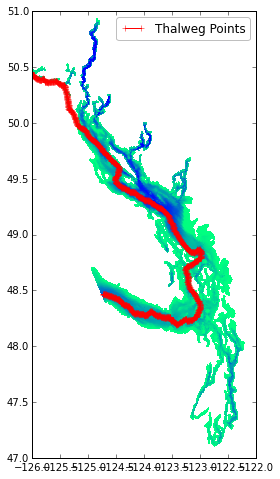

In [48]:
fig,ax=plt.subplots(1,1,figsize=(4,8))
ax.pcolormesh(T_lon[:], T_lat[:], bathy, cmap='winter_r')
ax.plot(thalweg_lon,thalweg_lat,linestyle='-', marker='+', color='red',
    label='Thalweg Points')
legend = ax.legend(loc='best', fancybox=True, framealpha=0.25)
ax.axis([-126,-122,47,51])

# Surface

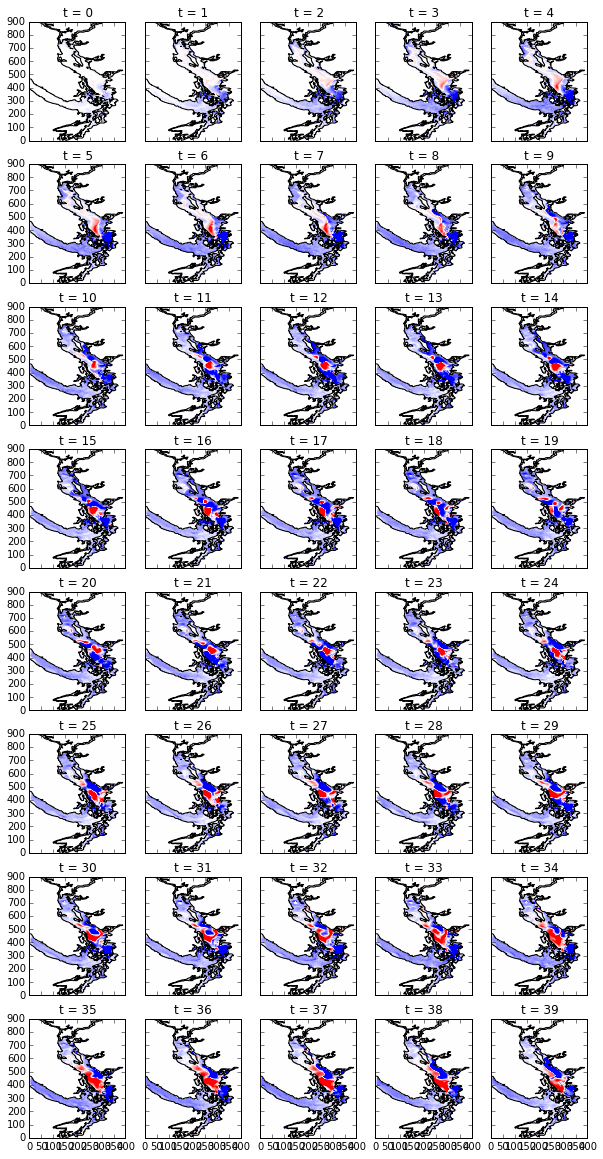

In [49]:
fig,axs=plt.subplots(8,5,figsize=(10,20),sharex=True,sharey=True)
smin=-1;smax=1; dep=0
run1='dwr_notsmooth_kappa10'; run2='dwr_notsmooth'
for t,ax in zip(np.arange(40),axs.flat):
    salP=sals[run1][t,dep,:,:];
    salP1=salP
    salP=sals[run2][t,dep,:,:];
    mesh=ax.pcolormesh(salP1-salP,vmin=smin,vmax=smax,cmap='bwr')
    viz_tools.plot_coastline(ax,grid)
    
    ax.set_title('t = ' +str(t))

Surface waters fresher in most places except near the plume. It seems that plume dynamics are greatly modified with small changes in mixing parameters. Oh perhaps satrutating plume at +-1 isn't a good measure of difference in the plume. Are small salinity changes more significant in different parts of the Strait? 

In [4]:
def average_thalweg(depth, index1,index2, var):
    #Averages the given variable along the thalweg at a depth and for indices between index1 and index2
    
    var_thal = var[depth,lines[:,0],lines[:,1]]
    #mask
    mu = var_thal==0
    var_thal=np.ma.array(var_thal,mask=mu)
    
    var_average=np.nanmean(var_thal[index1:index2])
    
    return var_average

dwr_notsmooth_kappa10 - dwr_notsmooth


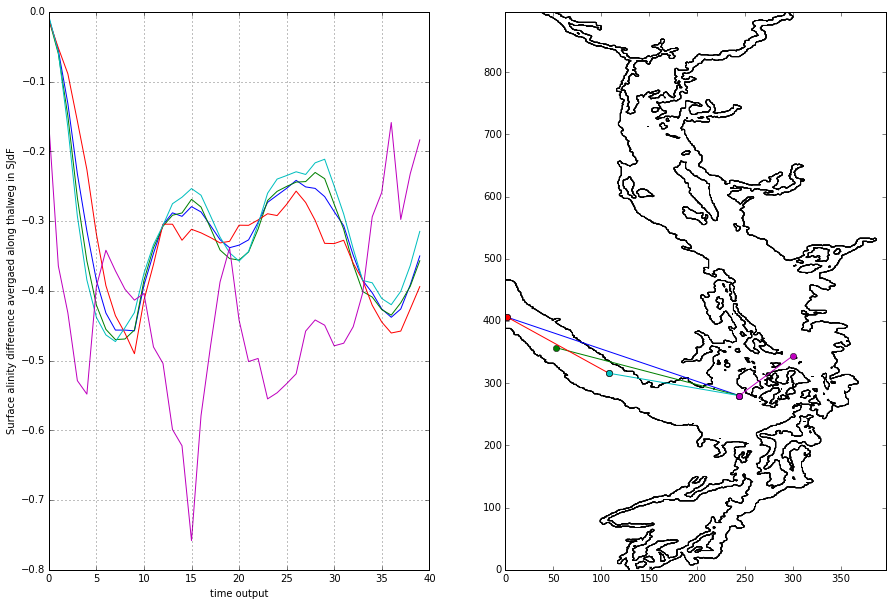

In [8]:
#plot now
t1=0;t2=40;
name2='dwr_notsmooth_kappa10'; name1='dwr_notsmooth'
fig,axs = plt.subplots(1,2,figsize=(15,10))
diffs = sals[name2][t1:t2,:,:,:]-sals[name1][t1:t2,:,:,:]
tm=np.arange(t1,t2)
inds1 = [0,100,0,200,450]; inds2= [450,450,200,450,600]
dep=0; 
for ind1,ind2 in zip(inds1,inds2):
    averages = []
    for n in range(diffs.shape[0]):
        averages.append(average_thalweg(dep,ind1,ind2,diffs[n,:,:,:]))
    ax=axs[0]
    ax.plot(tm,averages)
    ax.set_xlabel('time output')
    ax.set_ylabel('Surface alinity difference avergaed along thalweg in SJdF')

    ax=axs[1]
    viz_tools.plot_coastline(ax,grid)
    ax.plot([lines[ind1,1],lines[ind2,1]],[lines[ind1,0],lines[ind2,0]],'o-')
axs[0].grid()
    
print name2 + ' - ' + name1

* Spring/Neap dependency visible.
* Compared to smoothing: had a bigger dip in Haro Strait line betweent= 21 and 24. Smoothing had slightly smaller differences in JdF lines. (.1 to .2 PSU)
* wondering about the combination of smoothing and lower kappa.

Left: Kappa 10
Right: Regular


/home/nsoontie/anaconda/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/home/nsoontie/anaconda/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


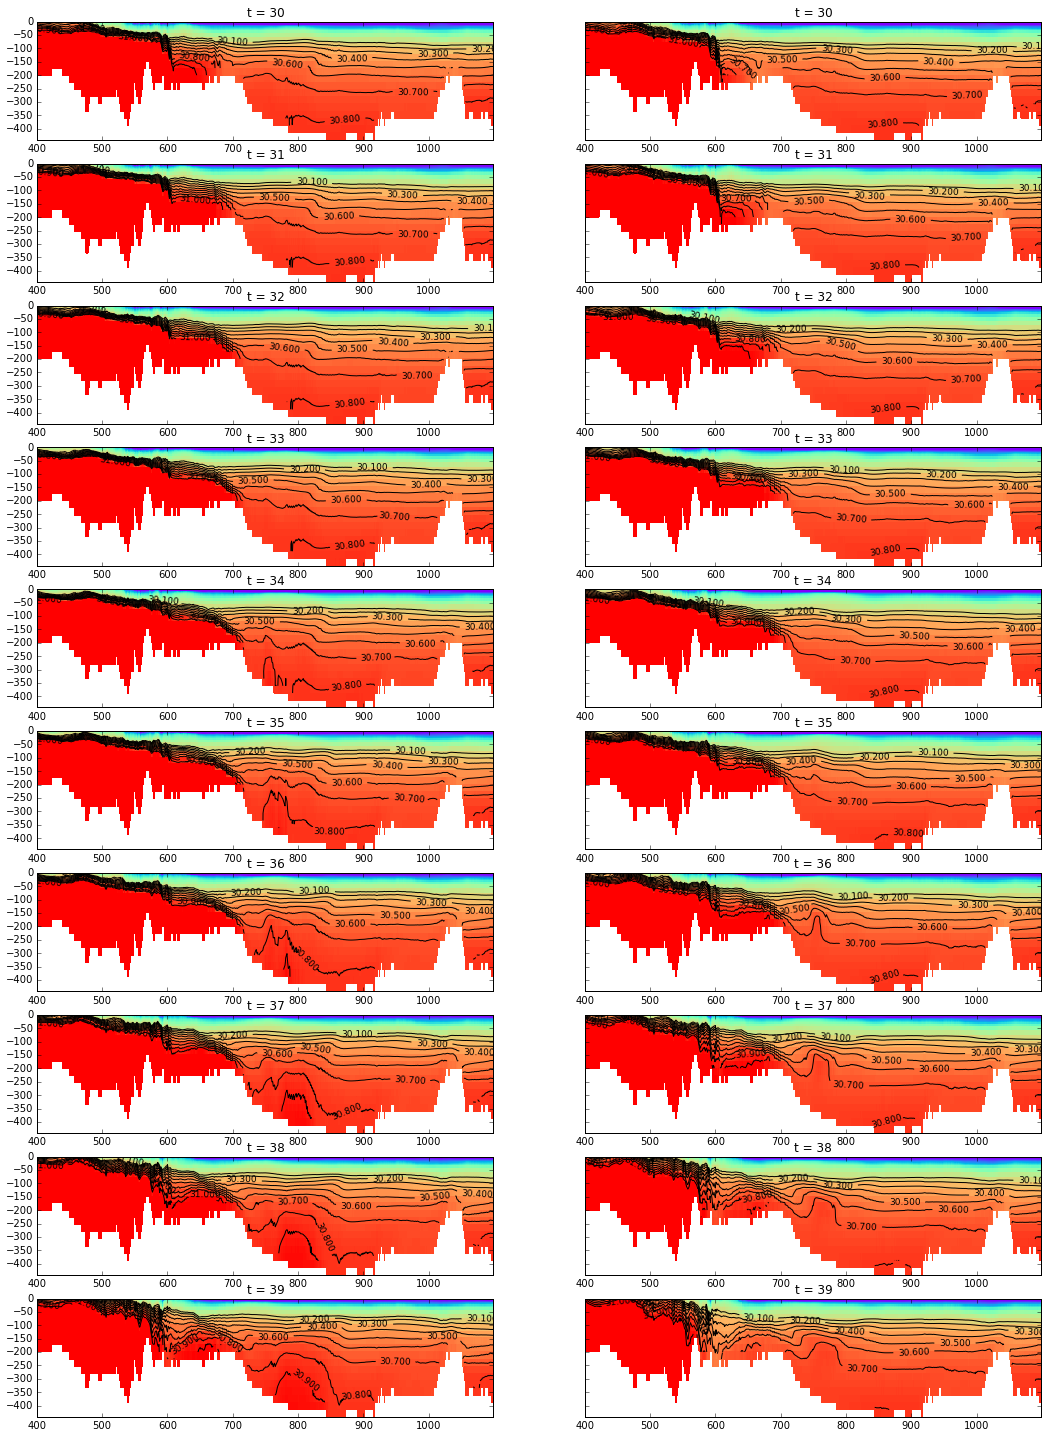

In [9]:
smin=28; smax=31
emin=-4; emax=2

(fig,axs)=plt.subplots(10,2,figsize=(18,25),sharey=True)
ts=np.arange(30,40,1)
vs=np.arange(31,30,-0.1);

r1=400; r2=1100;

for t,ax1,ax2 in zip(ts,axs[:,0],axs[:,1]):
    #salinity
    run='dwr_notsmooth_kappa10'
    salP=sals[run][t,:,lines[r1:r2,0],lines[r1:r2,1]];
    mu =salP == 0; salP= np.ma.array(salP,mask=mu)
    mesh=ax1.pcolormesh(XX_T[run][:,r1:r2],ZZ_T[run][:,r1:r2],salP,vmin=smin,vmax=smax,cmap='rainbow')
    CS=ax1.contour(XX_T[run][:,r1:r2],ZZ_T[run][:,r1:r2],salP,vs, colors='black')
    ax1.clabel(CS,fontsize=9, inline=1)
    ax1.set_title('t = ' +str(t))
    
    run='dwr_notsmooth'
    salP=sals[run][t,:,lines[r1:r2,0],lines[r1:r2,1]];
    mu =salP == 0; salP= np.ma.array(salP,mask=mu)
    mesh=ax2.pcolormesh(XX_T[run][:,r1:r2],ZZ_T[run][:,r1:r2],salP,vmin=smin,vmax=smax,cmap='rainbow')
    CS=ax2.contour(XX_T[run][:,r1:r2],ZZ_T[run][:,r1:r2],salP,vs, colors='black')
    ax2.clabel(CS,fontsize=9, inline=1)
    ax2.set_title('t = ' +str(t))
print 'Left: Kappa 10'
print 'Right: Regular'

DWR pulse is about .2 psu higher in lower kappa case. 